# Commodities

This example uses the 'Commodities' dataset to predict the price of different commodities. You can download the Jupyter Notebook of the study <a href="commodities.ipynb">here</a>.

<ul class="ul_content">
    <li><b>date: </b>Date of the record</li>
    <li><b>Gold: </b>Price per ounce of Gold</li>
    <li><b>Oil: </b>Price per Barrel - West Texas Intermediate (WTI)</li>
    <li><b>Spread: </b>Interest Rate Spreads.</li>
    <li><b>Vix: </b>The CBOE Volatility Index (VIX) is a measure of expected price fluctuations in the SP500 Index options over the next 30 days.</li>
    <li><b>Dol_Eur: </b>How much $1 US is in euros.</li>
    <li><b>SP500: </b>The S&P 500, or simply the S&P, is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States.</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

This example uses the following version of VerticaPy:

In [1]:
import verticapy as vp
vp.__version__

'0.9.0'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="../../connection.php">connection tutorial</a>.

In [2]:
vp.connect("VerticaDSN")

Let's create a Virtual DataFrame of the dataset.

,📅dateDate,123GoldFloat,123OilFloat,123SpreadFloat,123VixFloat,123Dol_EurFloat,123SP500Float
1,1986-01-01,345.561363636364,22.9254545454545,1.05142857142857,18.1213636363636,1.12159999999858,211.779999
2,1986-02-01,339.0525,15.4547368421053,0.736842105263158,20.6242105263158,1.07880000000296,226.919998
3,1986-03-01,346.094736842105,12.6125,0.564,23.564,1.04850000000442,238.899994
4,1986-04-01,340.715909090909,12.8436363636364,0.604090909090909,23.0154545454545,1.05259999999544,235.520004
5,1986-05-01,342.325,15.377619047619,0.642380952380952,18.8875,1.03720000000612,247.350006
6,1986-06-01,342.797619047619,13.4257142857143,0.614761904761905,18.5980952380952,1.0399999999936,250.839996
7,1986-07-01,348.554347826087,11.5845454545455,0.636818181818182,19.6390909090909,1.01029999999446,236.119995
8,1986-08-01,376.29,15.0966666666667,0.83952380952381,18.6380952380952,0.979300000000876,252.929993
9,1986-09-01,418.152272727273,14.8666666666667,1.10142857142857,22.7052380952381,0.973200000000361,231.320007
10,1986-10-01,423.863043478261,14.8968181818182,1.14727272727273,22.5239130434783,0.961600000000544,243.979996

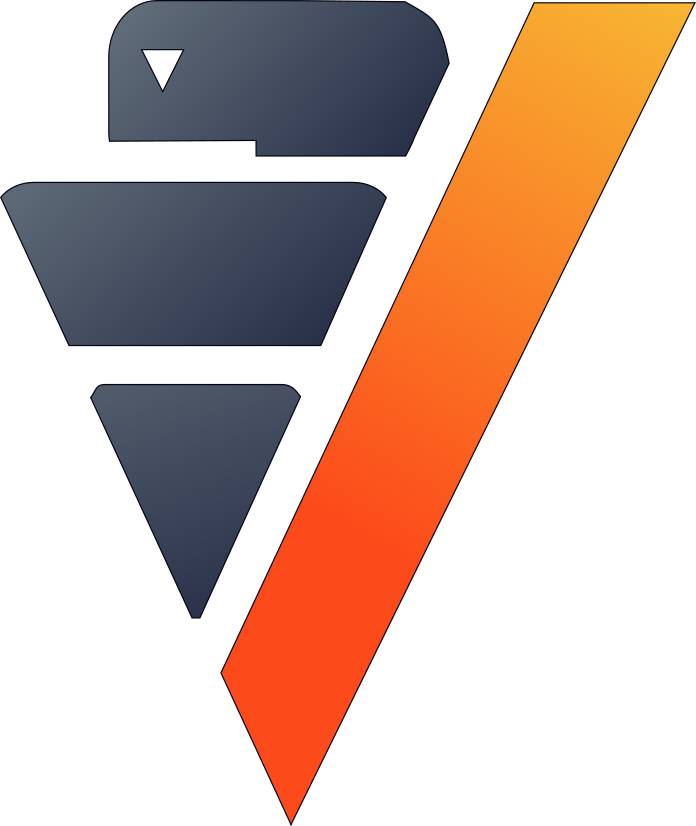

In [3]:
from verticapy.datasets import load_commodities
commodities = load_commodities()
display(commodities)

## Data Exploration and Preparation

Let's explore the data by displaying descriptive statistics of all the columns.

,"123""Gold""Float100%","123""Oil""Float100%","123""Spread""Float100%","123""Vix""Float100%","123""Dol_Eur""Float100%","123""SP500""Float100%","📅""date""Date100%"
dtype,float,float,float,float,float,float,date
percent,100,100,100,100,100,100,100
count,416,416,416,416,416,416,416
top,1715.69736842105,94.7566666666667,0.0733333333333333,17.156,0.807199999999284,375.220001,1986-01-01
top_percent,0.24,0.24,0.481,0.24,0.481,0.481,0.24
avg,720.569809753815,44.0579252458624,1.08827531978751,20.1401719548448,0.849616545697939,1190.84896648798,[null]
stddev,470.8105631842,28.9281842560106,0.85864363632335,8.61242315019305,0.107742852952828,752.215482101544,[null]
min,256.197727272727,11.3472727272727,-0.413157894736842,8.02,0.634608695652174,211.779999,1986-01-01
approx_25%,356.899837662338,19.771525974026,0.304,14.0076190476191,0.770517047499652,467.657494,[null]
approx_50%,421.556011904762,31.4188612836439,1.00318181818181,18.06625,0.836329950325119,1132.5,[null]

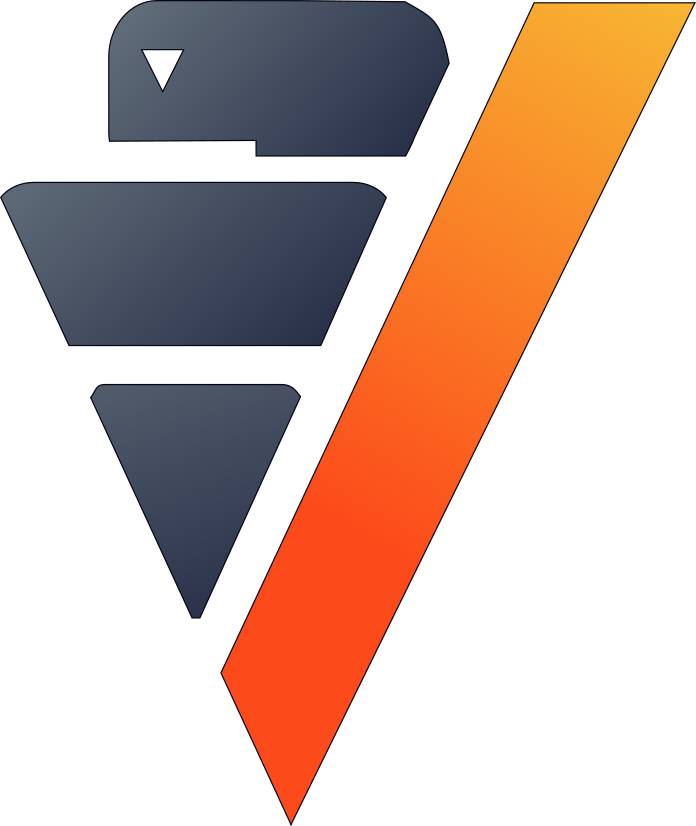

In [6]:
commodities.describe(method = "all", unique = True)

We have data from January 1986 to the beginning of August 2020. We don't have any missing values, so our data is already clean.

Let's draw the different variables.

<AxesSubplot:xlabel='"date"'>

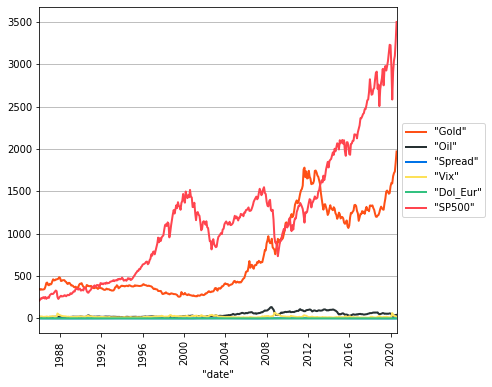

In [8]:
%matplotlib inline
commodities.plot(ts = "date")

Some of the commodities have an upward monotonic trend and some others might be stationary. Let's use Augmented Dickey-Fuller tests to check our hypotheses. 

,Gold,Oil,Spread,Vix,Dol_Eur,SP500
ADF Test Statistic,-0.8615535609119586,-2.8096937546469283,-2.4384304559428434,-4.930594978481499,-2.7980161815599516,-0.09469625542100038
p_value,0.389441781898794,0.00519866095306732,0.0151790361779463,1.19713909737974e-06,0.00538662270061962,0.924602810088177
# Lags used,3,3,3,3,3,3
# Observations Used,416,416,416,416,416,416
Critical Value (1%),3.98,3.98,3.98,3.98,3.98,3.98
Critical Value (2.5%),-3.68,-3.68,-3.68,-3.68,-3.68,-3.68
Critical Value (5%),-3.42,-3.42,-3.42,-3.42,-3.42,-3.42
Critical Value (10%),-3.13,-3.13,-3.13,-3.13,-3.13,-3.13
Stationarity (alpha = 1%),❌,✅,❌,✅,✅,❌

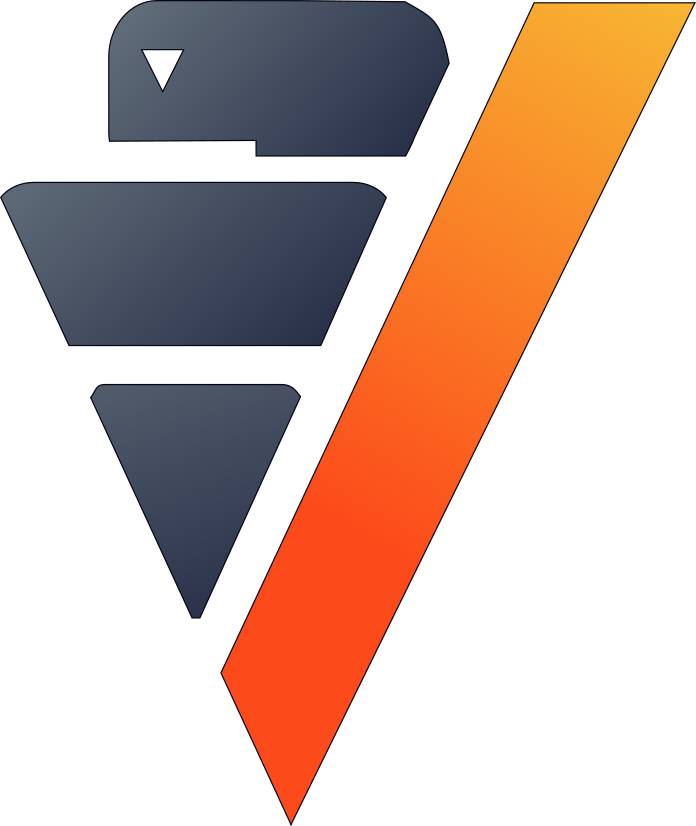

In [15]:
from verticapy.stats import adfuller
from verticapy import *

fuller = {}
for commodity in ["Gold", "Oil", "Spread", "Vix", "Dol_Eur", "SP500"]:
    result = adfuller(commodities,
                      column = commodity,
                      ts = "date",
                      p = 3,
                      with_trend = True)
    fuller["index"] = result["index"]
    fuller[commodity] = result["value"]
fuller = tablesample(fuller)
display(fuller)

As expected: The price of gold and the S&P 500 index are not stationary. Let's use the Mann-Kendall test to confirm the trends.

,Gold,SP500
Mann Kendall Test Statistic,15.001075433725964,24.886617341458717
S,42504.0,70513.0
STDS,2833.33019607669,2833.33001960591
p_value,7.223928538831201e-51,1.0387121156452156e-136
Monotonic Trend,✅,✅
Trend,increasing,increasing

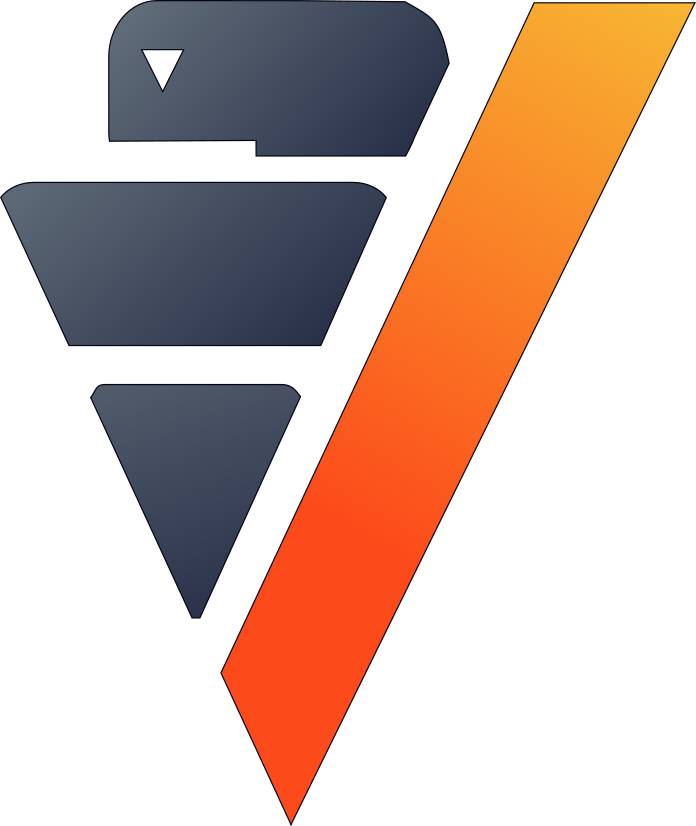

In [26]:
from verticapy.stats import mkt

kendall = {}
for commodity in ["Gold", "SP500"]:
    result = mkt(commodities,
                 column = commodity,
                 ts = "date")
    kendall["index"] = result["index"]
    kendall[commodity] = result["value"]
kendall = tablesample(kendall)
display(kendall)

Our hypothesis is correct. We can also look at the correlation between the elapsed time and our variables to see the different trends.

,"""elapsed_days"""
"""elapsed_days""",1.0
"""SP500""",0.912
"""Gold""",0.83
"""Oil""",0.712
"""Spread""",0.178
"""Dol_Eur""",-0.177
"""Vix""",-0.123

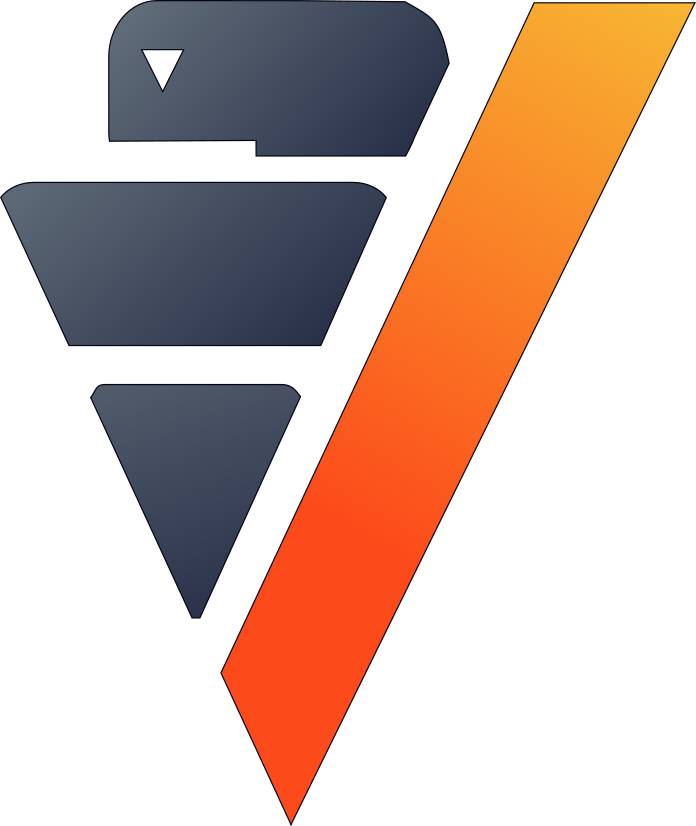

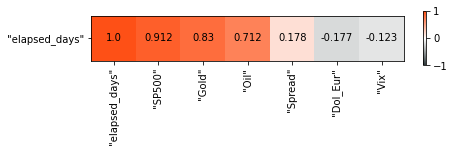

In [27]:
import verticapy.stats as st
commodities["elapsed_days"] = commodities["date"] - st.min(commodities["date"])._over()
commodities.corr(focus = "elapsed_days")

In the last plot, it's a bit hard to tell if 'Spread' is stationary. Let's draw it alone.

<AxesSubplot:xlabel='"date"', ylabel='"Spread"'>

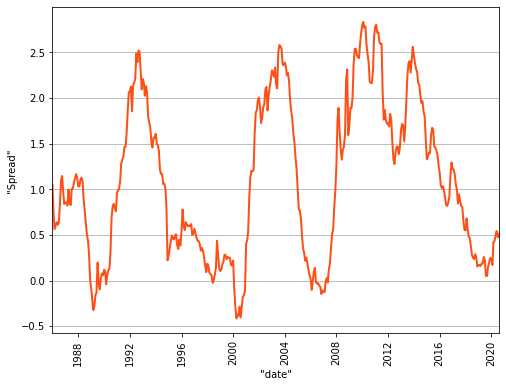

In [28]:
commodities["Spread"].plot(ts = "date")

We can see some sudden changes, so let's smooth the curve.

<AxesSubplot:xlabel='"date"', ylabel='"Spread_smooth"'>

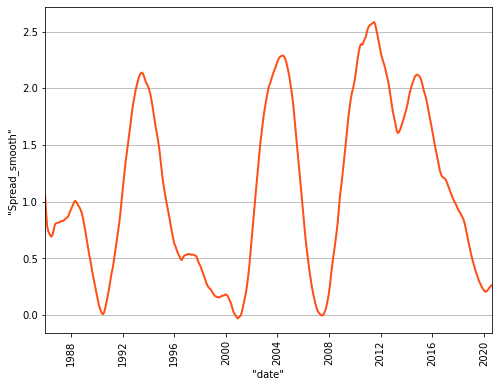

In [29]:
commodities.rolling(func = "avg",
                    window = (-20, 0),
                    columns = "Spread",
                    order_by = ["date"],
                    name = "Spread_smooth",)
commodities["Spread_smooth"].plot(ts = "date")

After each local minimum, there is a local maximum. Let's look at the number of lags needed to keep most of the information. To visualize this, we can draw the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots.

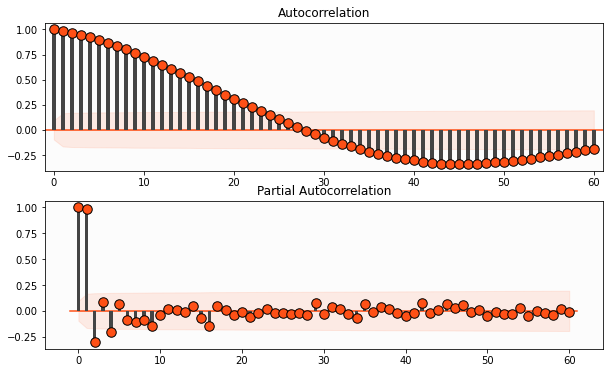

,acf,pacf,confidence
0,1.0,1.0,0.09609514041450774
1,0.987,0.986665869482618,0.16516404714137115
2,0.966,-0.301561968384232,0.1703898204716388
3,0.945,0.0844166594141543,0.17098407552667444
4,0.92,-0.201885034178834,0.1733971035027304
5,0.895,0.061854739837099,0.17381378139741463
6,0.868,-0.0896785060630146,0.1744580710199262
7,0.838,-0.103305688149318,0.17524412731694863
8,0.805,-0.0877012026295132,0.17587100727343766
9,0.767,-0.146682496028717,0.17723645098664653

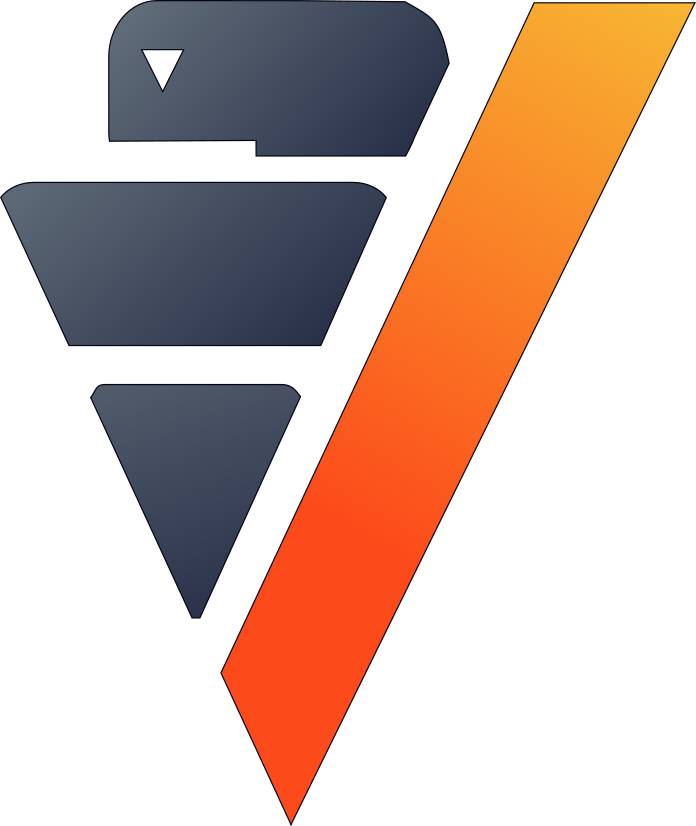

In [31]:
from verticapy.learn.model_selection import plot_acf_pacf
plot_acf_pacf(commodities,
              column = "Spread",
              ts = "date",
              p = 60)

We can clearly see the influence of the last two values on 'Spread,' which makes sense. When the curve slightly changes its direction, it will increase/decrease until reaching a new local maximum/minimum. Only the recent values can help the prediction in case of autoregressive periodical model. The local minimums of interest rate spreads are indicators of an economic crisis.

We saw the correlation between the price-per-barrel of Oil and the time. Let's look at the time series plot of this variable.

<AxesSubplot:xlabel='"date"', ylabel='"Oil"'>

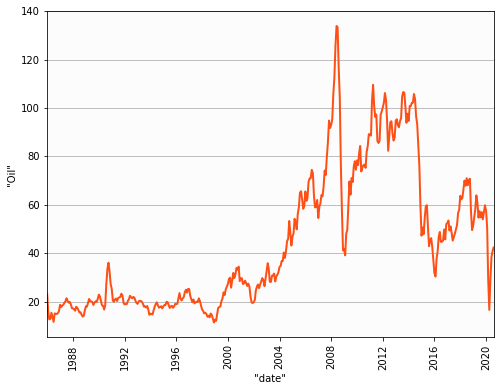

In [32]:
commodities["Oil"].plot(ts = "date")

Our chart shows effects of the 2010s oil glut and its lowest price in two decades with COVID-19.

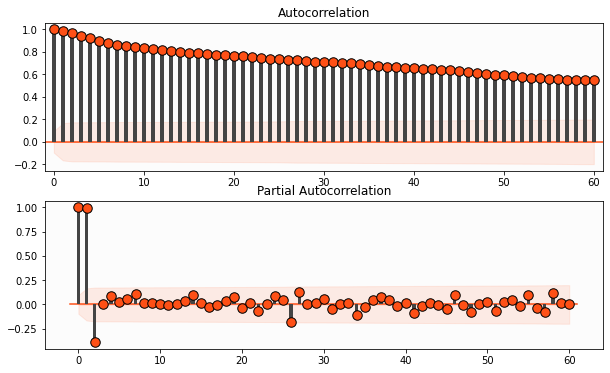

,acf,pacf,confidence
0,1.0,1.0,0.09609514041450774
1,0.988,0.987884757629262,0.1652988774305852
2,0.967,-0.387128775002593,0.17369786171044213
3,0.942,0.000478730454656422,0.17390803479721986
4,0.919,0.0888005740450176,0.17454071391637882
5,0.899,0.0276076830032854,0.17479368202017592
6,0.88,0.0596148107529968,0.17519687999673458
7,0.865,0.109492255412678,0.17605167920992634
8,0.854,0.0136795225303431,0.17627729203315676
9,0.844,0.015985704829806,0.1765073813497844

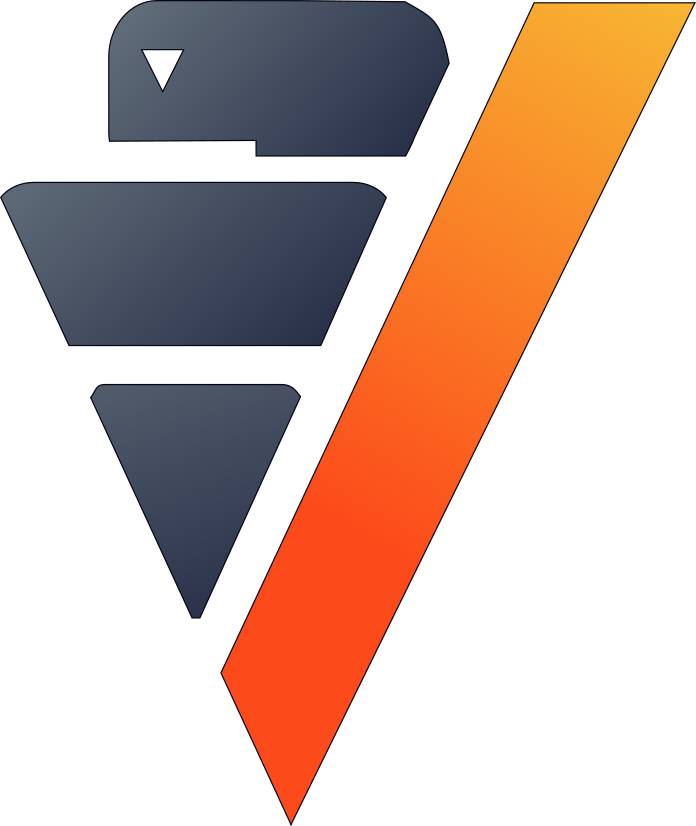

In [33]:
plot_acf_pacf(commodities,
              column = "Oil",
              ts = "date",
              p = 60)

Moving on to the correlation matrix, we can see many events that changed drastically the values of commodities, and we know of a correlation between all of them. From here, we could look at how strong this correlation is, which will help us create a model that properly combines all the variable lags in its predictions.

,"""Gold""","""Oil""","""Spread""","""Vix""","""Dol_Eur""","""SP500"""
"""Gold""",1.0,0.751395029423203,0.256809387586632,-0.128566723315959,-0.352007051068814,0.719569677026004
"""Oil""",0.751395029423203,1.0,0.35275473168768,-0.156604229764112,-0.535646665223741,0.500360581328835
"""Spread""",0.256809387586632,0.35275473168768,1.0,0.0733524059609736,-0.31444602227845,-0.101414745627458
"""Vix""",-0.128566723315959,-0.156604229764112,0.0733524059609736,1.0,0.186838468951734,-0.170921946022666
"""Dol_Eur""",-0.352007051068814,-0.535646665223741,-0.31444602227845,0.186838468951734,1.0,0.0430653239836862
"""SP500""",0.719569677026004,0.500360581328835,-0.101414745627458,-0.170921946022666,0.0430653239836862,1.0

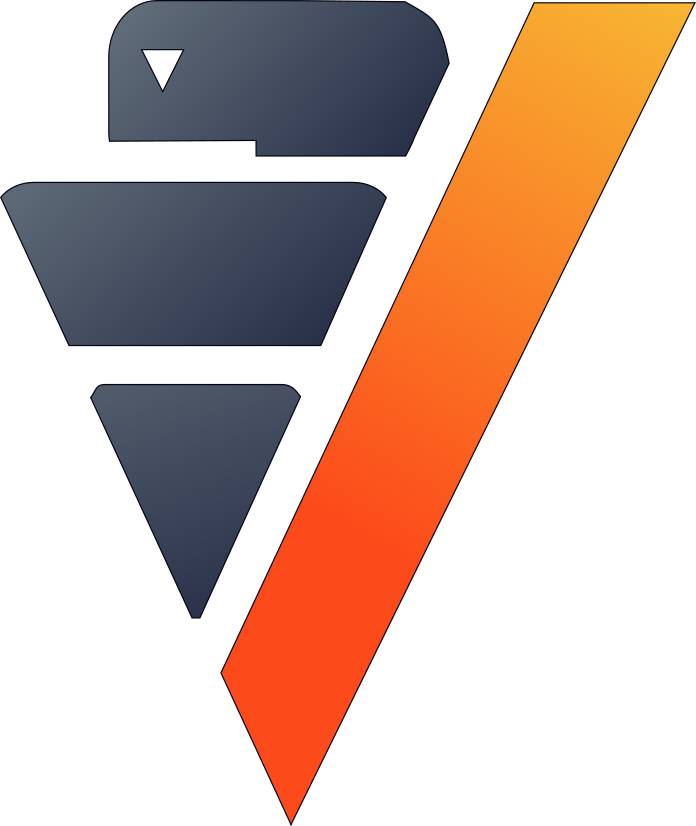

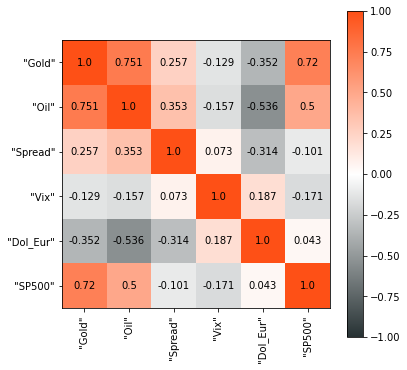

In [34]:
commodities.corr(columns = ["Gold", "Oil", "Spread", "Vix", "Dol_Eur", "SP500"])

We can see strong correlations between most of the variables. A vector autoregression (VAR) model seems ideal.

## Machine Learning

Let's create the VAR model to predict the value of various commodities.

,r2
"""Gold""",0.997853209003005
"""Oil""",0.990326386987279
"""Spread""",0.989401462653497
"""Vix""",0.886188715050127
"""Dol_Eur""",0.985130231718907
"""SP500""",0.996890808279884

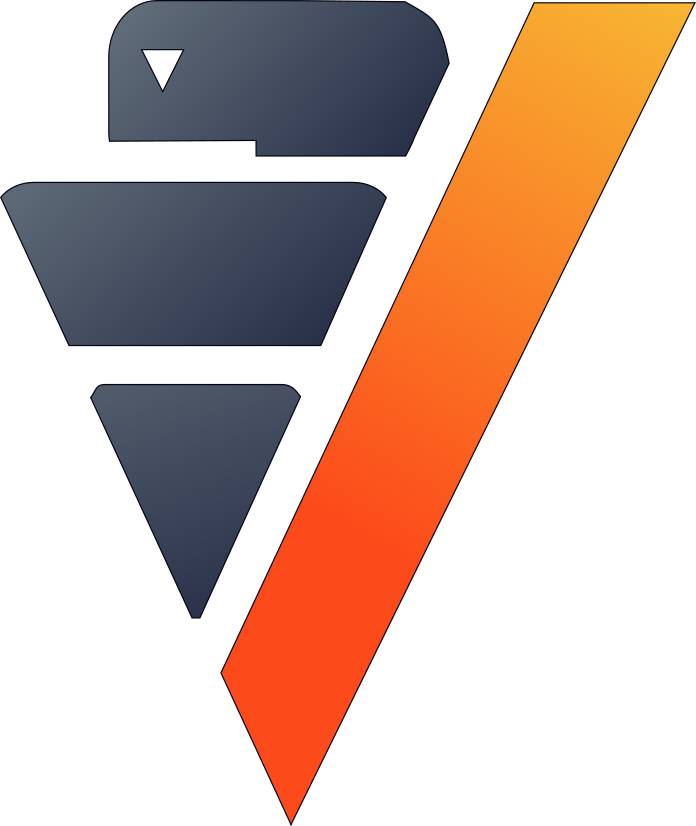

In [35]:
from verticapy.learn.tsa import VAR

model = VAR("commodities_var", p = 30)
model.fit(commodities,
          X = ["Gold", "Oil", "Spread", "Vix", "Dol_Eur", "SP500"],
          ts = "date")
model.score()

Our model is excellent. Let's predict the values these commodities in the near future.

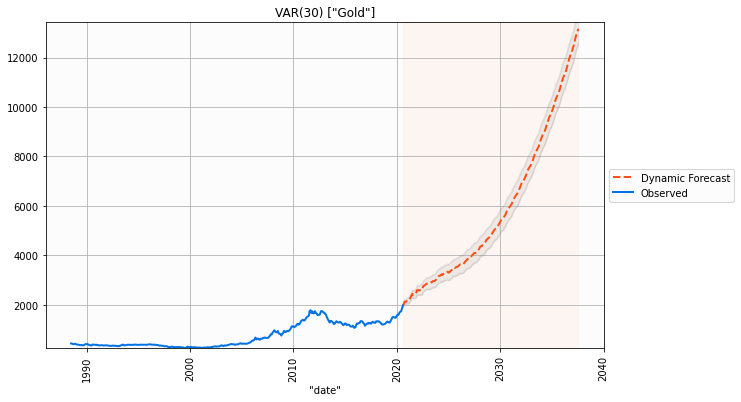

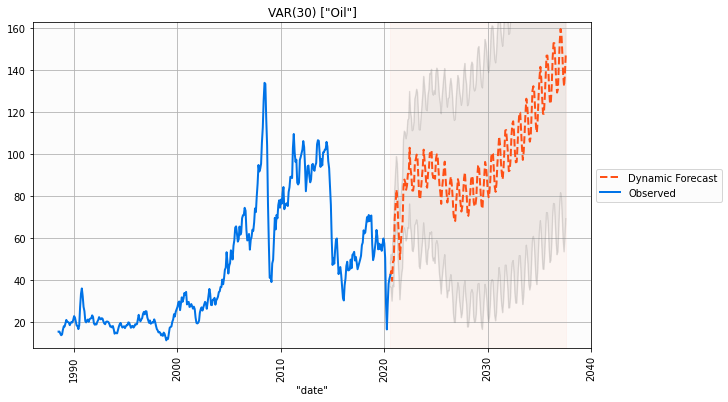

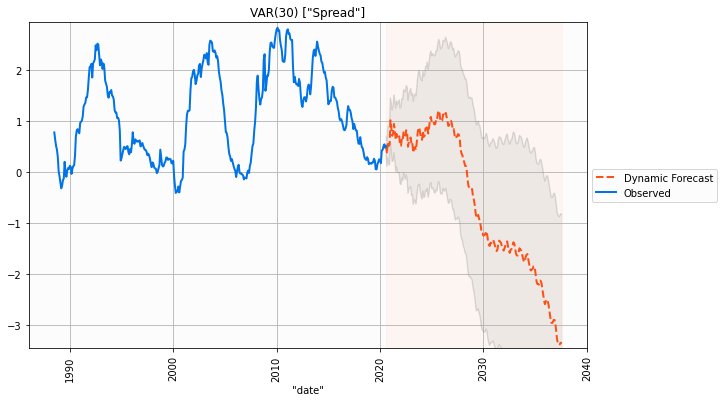

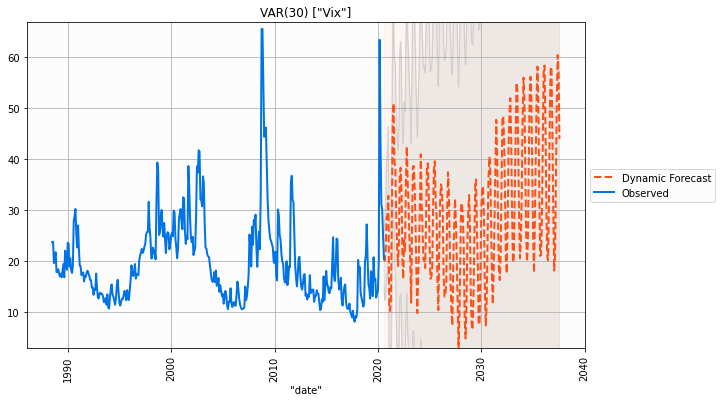

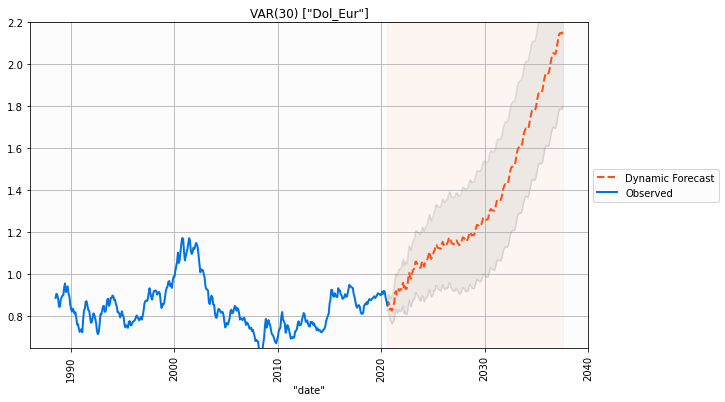

In [36]:
for i in range(5):
    model.plot(commodities,
               nlead = 200,
               X_idx = i,
               dynamic = True,
               one_step = False)

Let's add the prediction to the vDataFrame.

,📅dateDate,123GoldFloat,123OilFloat,123SpreadFloat,123VixFloat,123Dol_EurFloat,123SP500Float,123elapsed_daysInteger,123Spread_smoothFloat,123VAR_GoldFloat,123VAR_OilFloat,123VAR_SpreadFloat,123VAR_VixFloat,123VAR_DolEurFloat,123VAR_SP500Float
1,1986-01-01,345.561363636364,22.9254545454545,1.05142857142857,18.1213636363636,1.12159999999858,211.779999,0,1.05142857142857,[null],[null],[null],[null],[null],[null]
2,1986-02-01,339.0525,15.4547368421053,0.736842105263158,20.6242105263158,1.07880000000296,226.919998,31,0.894135338345864,[null],[null],[null],[null],[null],[null]
3,1986-03-01,346.094736842105,12.6125,0.564,23.564,1.04850000000442,238.899994,59,0.784090225563909,[null],[null],[null],[null],[null],[null]
4,1986-04-01,340.715909090909,12.8436363636364,0.604090909090909,23.0154545454545,1.05259999999544,235.520004,90,0.739090396445659,[null],[null],[null],[null],[null],[null]
5,1986-05-01,342.325,15.377619047619,0.642380952380952,18.8875,1.03720000000612,247.350006,120,0.719748507632718,[null],[null],[null],[null],[null],[null]
6,1986-06-01,342.797619047619,13.4257142857143,0.614761904761905,18.5980952380952,1.0399999999936,250.839996,151,0.702250740487582,[null],[null],[null],[null],[null],[null]
7,1986-07-01,348.554347826087,11.5845454545455,0.636818181818182,19.6390909090909,1.01029999999446,236.119995,181,0.692903232106239,[null],[null],[null],[null],[null],[null]
8,1986-08-01,376.29,15.0966666666667,0.83952380952381,18.6380952380952,0.979300000000876,252.929993,212,0.711230804283436,[null],[null],[null],[null],[null],[null]
9,1986-09-01,418.152272727273,14.8666666666667,1.10142857142857,22.7052380952381,0.973200000000361,231.320007,243,0.754586111744006,[null],[null],[null],[null],[null],[null]
10,1986-10-01,423.863043478261,14.8968181818182,1.14727272727273,22.5239130434783,0.961600000000544,243.979996,273,0.793854773296879,[null],[null],[null],[null],[null],[null]

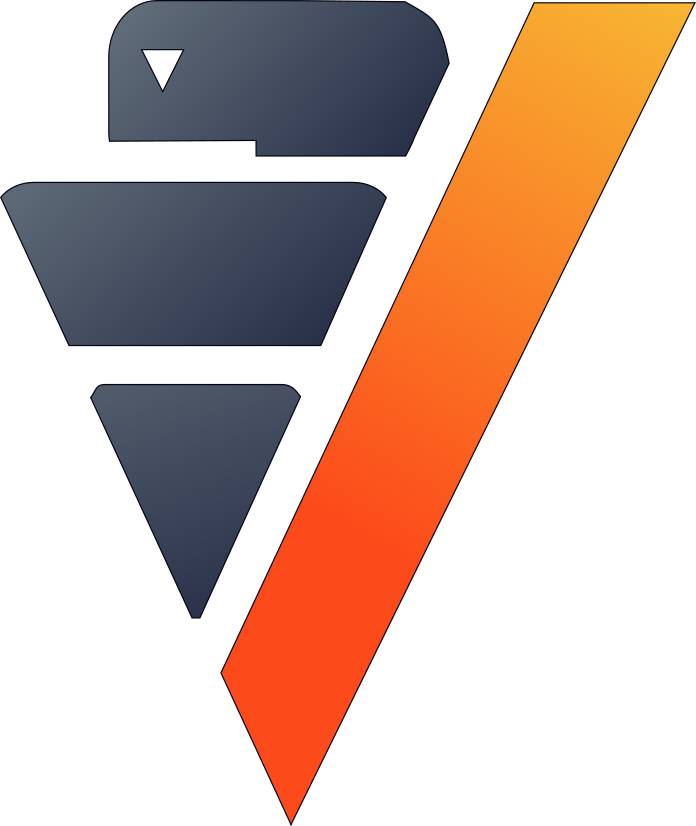

In [37]:
commodities = model.predict(commodities)
display(commodities)

Let's compare the distribution of our prediction and the real value for the variable 'Gold'.

<AxesSubplot:>

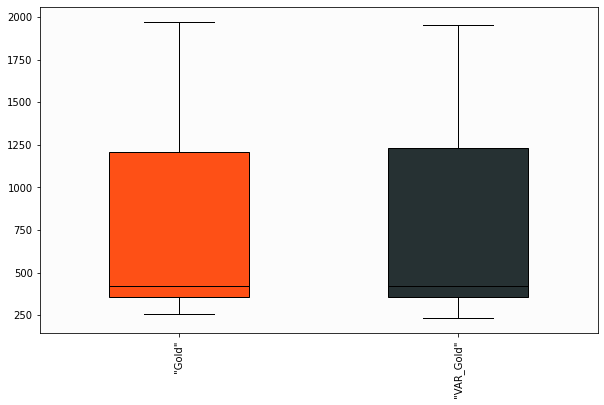

In [38]:
commodities.boxplot(columns = ["Gold", "VAR_Gold"])

We can see that the distributions are similar.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!